#**Import Packages**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
# Install Geopandas, more about geopandas at https://geopandas.org/
#!pip install git+git://github.com/geopandas/geopandas.git
# Install contextily (adding basemap), more about contextily at https://pypi.org/project/contextily/
!pip install --upgrade geopandas
!pip install --upgrade pyshp
!pip install --upgrade shapely
!pip install --upgrade descartes
!pip install contextily
import geopandas as gpd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 8.1 MB/s 
     |████████████████████████████████| 16.6 MB 47.6 MB/s 
     |████████████████████████████████| 7.8 MB 47.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 46 kB 1.6 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 20.9 MB 3.2 MB/s 
     |████████████████████████████████| 55 kB 3.5 MB/s 


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/My Drive/PNG497 Project
%ls

/content/drive/My Drive/PNG497 Project
 combined_data.txt                       'PNG497 Project.ipynb'
'Copy of Lab4_RosemaryAkamagwuna.ipynb'   porositymapdata.txt
 decluscomb.gdoc                          primary_data_sort.txt
 decluscomb.txt                           samp_data.txt
 decluscopy.txt                           secondary_data_sort.txt
 file.txt.gdoc                            seismicgrid_data.csv
 finalcluster.txt                         seismicgrid_data.txt
 finallocmaptrend.txt                     seis.txt
 offset_data.txt


#**Import Sample Data, Offset Data and Seismic Ouput Data**

In [4]:
primary_data = pd.read_csv("/content/drive/My Drive/PNG497 Project/samp_data.txt",sep='  ',skiprows=[0],header=None, names = ['X','Y','Porosity'])
primary_data_copy = primary_data
primary_data_copy.head()

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


X        Y  Porosity
0  52500.0  50500.0     0.082
1  45500.0  50500.0     0.119
2  45500.0  51500.0     0.089
3  48500.0  45500.0     0.023
4  45500.0  50500.0     0.043

In [5]:
offset_data = pd.read_csv("/content/drive/My Drive/PNG497 Project/offset_data.txt",sep='  ',skiprows=[0,1,2,3,4],header=None, names = ['X','Y','Porosity'])
offset_data_copy = offset_data
offset_data_copy.head()

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


X        Y  Porosity
0  60500.0  31500.0     0.103
1  65500.0  68500.0     0.067
2  51500.0  60500.0     0.104
3  39500.0  62500.0     0.109
4  51500.0  39500.0     0.035

In [6]:
seismic_data = pd.read_csv("/content/drive/My Drive/PNG497 Project/seis.txt",sep='  ',skiprows=[0,1,2],header=None, names = ['Impedance'])
seismic_data_copy = seismic_data
seismic_data_copy.head()

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


Impedance
0  8590.00391
1  8655.00586
2  8634.99512
3  8590.00391
4  8590.00391

Add Coordinates to X and Y Impedance


In the next few steps I add coordinates to the seismic data counting from the lower left up.

In [7]:
x1 = 24500
x2 = 74500
y1 = 24500
y2 = 74500

In [8]:
n_x = 50
n_y = 50
# step_x = (x2 - x1) / n_x
# step_y = (y2 - y1) / n_y

In [9]:
(n_x+1) * (n_y+1)

2601

In [10]:
x_axis = np.linspace(x1, x2, n_x+1)
y_axis = np.linspace(y1, y2, n_y+1)
print(x_axis.shape, y_axis.shape)

mid_x_axis = pd.Series(x_axis).rolling(2).mean().dropna()
mid_y_axis = pd.Series(y_axis).rolling(2).mean().dropna()
print(mid_x_axis.shape, mid_y_axis.shape)

(51,) (51,)
(50,) (50,)


In [11]:
x_axis[:5], x_axis[-5:]

(array([24500., 25500., 26500., 27500., 28500.]),
 array([70500., 71500., 72500., 73500., 74500.]))

In [12]:
y_axis[:5], y_axis[-5:]

(array([24500., 25500., 26500., 27500., 28500.]),
 array([70500., 71500., 72500., 73500., 74500.]))

In [13]:
mid_x_axis.head(), mid_x_axis.tail()

(1    25000.0
 2    26000.0
 3    27000.0
 4    28000.0
 5    29000.0
 dtype: float64, 46    70000.0
 47    71000.0
 48    72000.0
 49    73000.0
 50    74000.0
 dtype: float64)

In [14]:
mid_y_axis.head(), mid_y_axis.tail()

(1    25000.0
 2    26000.0
 3    27000.0
 4    28000.0
 5    29000.0
 dtype: float64, 46    70000.0
 47    71000.0
 48    72000.0
 49    73000.0
 50    74000.0
 dtype: float64)

In [15]:
grid = [[(i, j) for i in x_axis] for j in y_axis]
grid = pd.DataFrame(np.array(grid).reshape(-1, 2), columns=['x', 'y'])
grid

x        y
0     24500.0  24500.0
1     25500.0  24500.0
2     26500.0  24500.0
3     27500.0  24500.0
4     28500.0  24500.0
...       ...      ...
2596  70500.0  74500.0
2597  71500.0  74500.0
2598  72500.0  74500.0
2599  73500.0  74500.0
2600  74500.0  74500.0

[2601 rows x 2 columns]

In [16]:
data = [[(i, j) for i in mid_x_axis] for j in mid_y_axis]
data = pd.DataFrame(np.array(data).reshape(-1, 2), columns=['x', 'y'])
data

x        y
0     25000.0  25000.0
1     26000.0  25000.0
2     27000.0  25000.0
3     28000.0  25000.0
4     29000.0  25000.0
...       ...      ...
2495  70000.0  74000.0
2496  71000.0  74000.0
2497  72000.0  74000.0
2498  73000.0  74000.0
2499  74000.0  74000.0

[2500 rows x 2 columns]

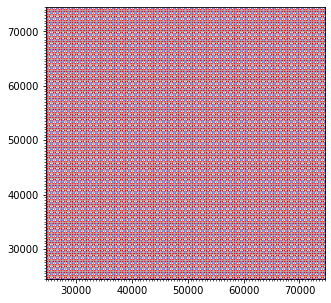

In [17]:
fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot(111)
plt.scatter(grid['x'], grid['y'], marker='.', s=15, c='b')
plt.scatter(data['x'], data['y'], marker='*', s=20, c='r')
ml = MultipleLocator(500)
plt.minorticks_on()
ax.xaxis.set_minor_locator(ml)
ax.yaxis.set_minor_locator(ml)
plt.xlim(x1, x2)
plt.ylim(y1, y2)
plt.grid(which='both')

In [18]:
data['Impedance'] = seismic_data_copy['Impedance']
data.head()

x        y   Impedance
0  25000.0  25000.0  8590.00391
1  26000.0  25000.0  8655.00586
2  27000.0  25000.0  8634.99512
3  28000.0  25000.0  8590.00391
4  29000.0  25000.0  8590.00391

In [19]:
# saving data
data.to_csv("seismicgrid_data.txt", index=False)

In [20]:
#import grided seismic data
seismicgrid_data = pd.read_csv("/content/drive/My Drive/PNG497 Project/seismicgrid_data.csv")
seismicgrid_data.head()

x        y   Impedance
0  25000.0  25000.0  8590.00391
1  26000.0  25000.0  8655.00586
2  27000.0  25000.0  8634.99512
3  28000.0  25000.0  8590.00391
4  29000.0  25000.0  8590.00391

In [21]:
# Creating a GeoDataFrame from a DataFrame with coordinates; 
# the GeoDataFrame data structure would allow me perform coordiate projection and overlap with other geospatial data
# 'crs' specify the coordinate system as WGS84
gdf_seis = gpd.GeoDataFrame(seismicgrid_data,
                       geometry = gpd.points_from_xy(seismicgrid_data.x,seismicgrid_data.y), crs ="EPSG:4326")

In [22]:
gdf_seis.head()

x        y   Impedance                         geometry
0  25000.0  25000.0  8590.00391  POINT (25000.00000 25000.00000)
1  26000.0  25000.0  8655.00586  POINT (26000.00000 25000.00000)
2  27000.0  25000.0  8634.99512  POINT (27000.00000 25000.00000)
3  28000.0  25000.0  8590.00391  POINT (28000.00000 25000.00000)
4  29000.0  25000.0  8590.00391  POINT (29000.00000 25000.00000)

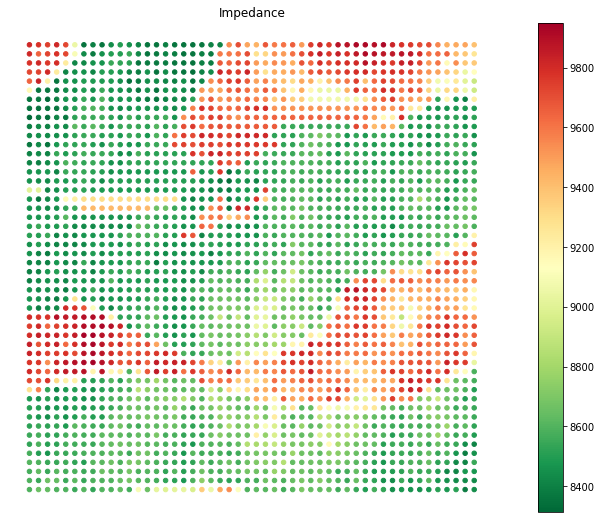

In [23]:
from enum import auto
# plot the geospatial data
fig, ax = plt.subplots(figsize=(15,9))
gdf_seis.plot(column='Impedance',
                markersize=20,
                cmap='RdYlGn_r', # color map
                legend=True,
                ax=ax , alpha =1.0, aspect=1)
ax.set(title='Impedance')
ax.set_axis_off()
plt.show()

Plot clustered Primary Data.

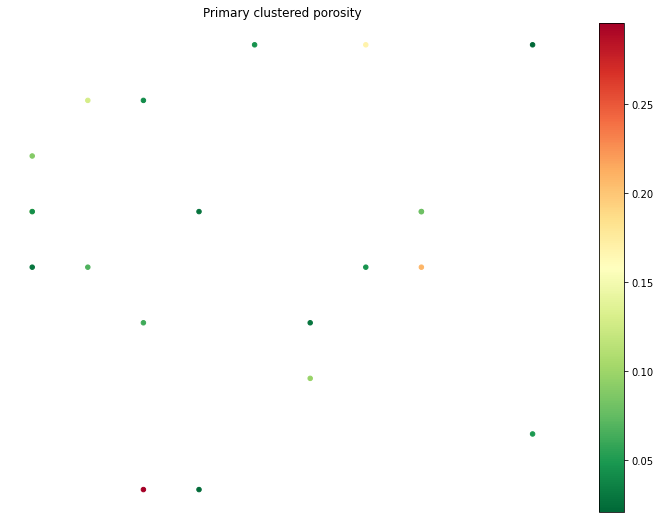

In [24]:
#Plot primary data before declustering

gdf_prim_clustered = gpd.GeoDataFrame(primary_data_copy,
                       geometry = gpd.points_from_xy(primary_data_copy.X,primary_data_copy.Y), crs ="EPSG:4326")
# plot the geospatial data
fig, ax = plt.subplots(figsize=(15,9))
gdf_prim_clustered.plot(column='Porosity',
                markersize=20,
                cmap='RdYlGn_r', # color map
                legend=True,
                ax=ax , alpha =1.0, aspect=1)
ax.set(title='Primary clustered porosity')
ax.set_axis_off()
plt.show()

Plot Clustered Offset Data

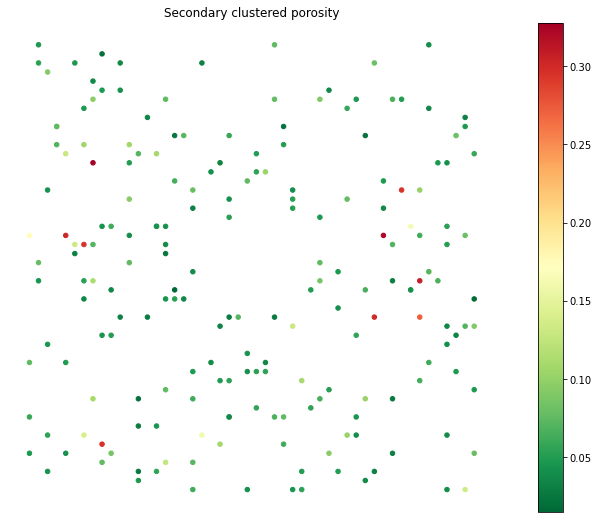

In [25]:
#Plot secondary data before declustering

gdf_sec_clustered = gpd.GeoDataFrame(offset_data_copy,
                       geometry = gpd.points_from_xy(offset_data_copy.X,offset_data_copy.Y), crs ="EPSG:4326")
# plot the geospatial data
fig, ax = plt.subplots(figsize=(15,9))
gdf_sec_clustered.plot(column='Porosity',
                markersize=20,
                cmap='RdYlGn_r', # color map
                legend=True,
                ax=ax , alpha =1.0, aspect=1)
ax.set(title='Secondary clustered porosity')
ax.set_axis_off()
plt.show()

**Merge primary and secondary (offset) data for visualization**

Data would be merged on the x and y axis respectively. The empty observations for the primary data will be filled with -1.0 as seen in the GSLib y_data set.

In [26]:
#merge the dataframes on the X and Y columns
combined_df = pd.merge(primary_data, offset_data, how='outer',on=['X','Y'], suffixes =('_prim','_sec'))
combined_df.head()

X        Y  Porosity_prim                    geometry_prim  \
0  52500.0  50500.0          0.082  POINT (52500.00000 50500.00000)   
1  52500.0  50500.0          0.080  POINT (52500.00000 50500.00000)   
2  45500.0  50500.0          0.119  POINT (45500.00000 50500.00000)   
3  45500.0  50500.0          0.043  POINT (45500.00000 50500.00000)   
4  45500.0  51500.0          0.089  POINT (45500.00000 51500.00000)   

   Porosity_sec geometry_sec  
0           NaN         None  
1           NaN         None  
2           NaN         None  
3           NaN         None  
4           NaN         None

In [27]:
combined_df.describe()

X             Y  Porosity_prim  Porosity_sec
count    222.000000    222.000000      21.000000    201.000000
mean   49400.900901  48936.936937       0.083714      0.071428
std    14118.089519  13253.295862       0.069537      0.058163
min    25500.000000  25500.000000       0.021000      0.015000
25%    37500.000000  38500.000000       0.042000      0.041000
50%    48500.000000  49500.000000       0.062000      0.053000
75%    61250.000000  59250.000000       0.098000      0.076000
max    74500.000000  74500.000000       0.296000      0.328000

In [28]:
combined_df.isna().sum()

X                  0
Y                  0
Porosity_prim    201
geometry_prim    201
Porosity_sec      21
geometry_sec      21
dtype: int64

In [29]:
#fill NAN values in primary data with -1 and NAN values in secondary data with the mean porosity of secondary data
combined_df[['Porosity_prim', 'Porosity_sec']] = combined_df[['Porosity_prim', 'Porosity_sec']].fillna(value={'Porosity_prim':-1,'Porosity_sec':0.071428})
combined_df.head()

X        Y  Porosity_prim                    geometry_prim  \
0  52500.0  50500.0          0.082  POINT (52500.00000 50500.00000)   
1  52500.0  50500.0          0.080  POINT (52500.00000 50500.00000)   
2  45500.0  50500.0          0.119  POINT (45500.00000 50500.00000)   
3  45500.0  50500.0          0.043  POINT (45500.00000 50500.00000)   
4  45500.0  51500.0          0.089  POINT (45500.00000 51500.00000)   

   Porosity_sec geometry_sec  
0      0.071428         None  
1      0.071428         None  
2      0.071428         None  
3      0.071428         None  
4      0.071428         None

In [30]:
combined_df.isna().sum()

X                  0
Y                  0
Porosity_prim      0
geometry_prim    201
Porosity_sec       0
geometry_sec      21
dtype: int64

In [31]:
combined_df = combined_df.sort_values(by=['X','Y'], ascending = True)
combined_df.head(10)

X        Y  Porosity_prim geometry_prim  Porosity_sec  \
135  25500.0  29500.0           -1.0          None         0.047   
167  25500.0  33500.0           -1.0          None         0.060   
123  25500.0  39500.0           -1.0          None         0.076   
35   25500.0  53500.0           -1.0          None         0.173   
81   26500.0  48500.0           -1.0          None         0.044   
33   26500.0  50500.0           -1.0          None         0.078   
28   26500.0  72500.0           -1.0          None         0.053   
119  26500.0  74500.0           -1.0          None         0.047   
88   27500.0  27500.0           -1.0          None         0.044   
159  27500.0  31500.0           -1.0          None         0.055   

                        geometry_sec  
135  POINT (25500.00000 29500.00000)  
167  POINT (25500.00000 33500.00000)  
123  POINT (25500.00000 39500.00000)  
35   POINT (25500.00000 53500.00000)  
81   POINT (26500.00000 48500.00000)  
33   POINT (26500.00000 50500.00000)  
28   POINT (26500.00000 72500.00000)  
119  POINT (26500.00000 74500.00000)  
88   POINT (27500.00000 27500.00000)  
159  POINT (27500.00000 31500.00000)

In [32]:
combined_df.describe()

X             Y  Porosity_prim  Porosity_sec
count    222.000000    222.000000     222.000000    222.000000
mean   49400.900901  48936.936937      -0.897486      0.071428
std    14118.089519  13253.295862       0.318558      0.055330
min    25500.000000  25500.000000      -1.000000      0.015000
25%    37500.000000  38500.000000      -1.000000      0.043000
50%    48500.000000  49500.000000      -1.000000      0.055500
75%    61250.000000  59250.000000      -1.000000      0.075000
max    74500.000000  74500.000000       0.296000      0.328000

current clustered mean is -0.897486 for primary data and 0.071428 for secondary data

In [33]:
# saving data
combined_df.to_csv("combined_data.txt",sep=' ', index=False)

Plot combined Primary and Secondary Clusetered Data on GSLIB using Locmap.exe

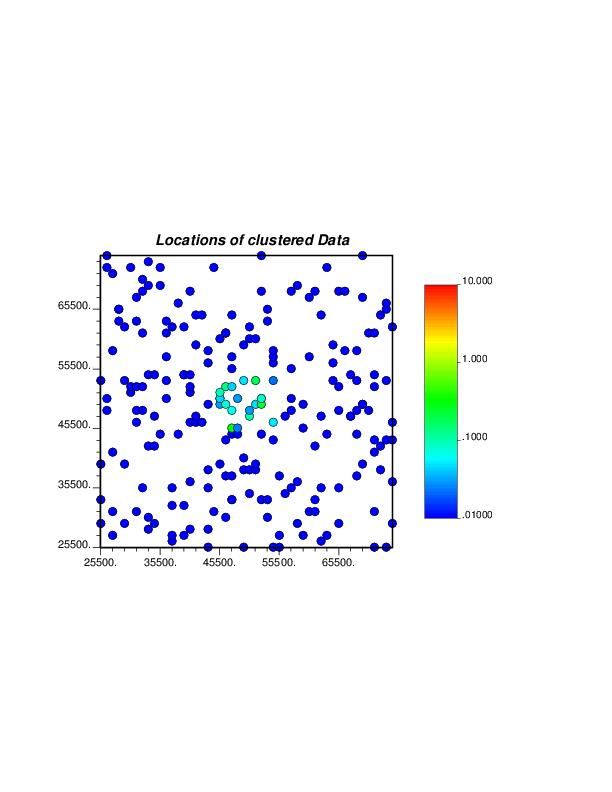

After visualizing the data I discovered that the primary data is a clustered sample of the secondary data. I decided to proceed with declustering but I was a bit confused on how to work with both data sets at first so I declustered them individually. I eventually proceeded to combine both data considering that they are both subsets of the same population and carried out declustering on the combined data as can be seen in later cells.

#**Declustering**

Decluster Primary Data using GSLIB Declus.exe

In [34]:
#sort primary data for declustering

primary_data_sort = pd.read_csv("/content/drive/My Drive/PNG497 Project/samp_data.txt",sep='  ',skiprows=[0],header=None, names = ['X','Y','Porosity'])
primary_data_sort = primary_data_sort.sort_values(by=['X','Y'], ascending = True)
primary_data_sort.head()

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


X        Y  Porosity
8   45500.0  49500.0     0.029
1   45500.0  50500.0     0.119
4   45500.0  50500.0     0.043
2   45500.0  51500.0     0.089
12  46500.0  49500.0     0.068

In [35]:
primary_data_sort.describe()

X             Y   Porosity
count     21.000000     21.000000  21.000000
mean   49261.904762  49976.190476   0.083714
std     3015.041657   2421.137080   0.069537
min    45500.000000  45500.000000   0.021000
25%    46500.000000  48500.000000   0.042000
50%    48500.000000  50500.000000   0.062000
75%    51500.000000  51500.000000   0.098000
max    54500.000000  53500.000000   0.296000

clustered mean was 0.0837

Histplt of Primary Data without Declustered Weights

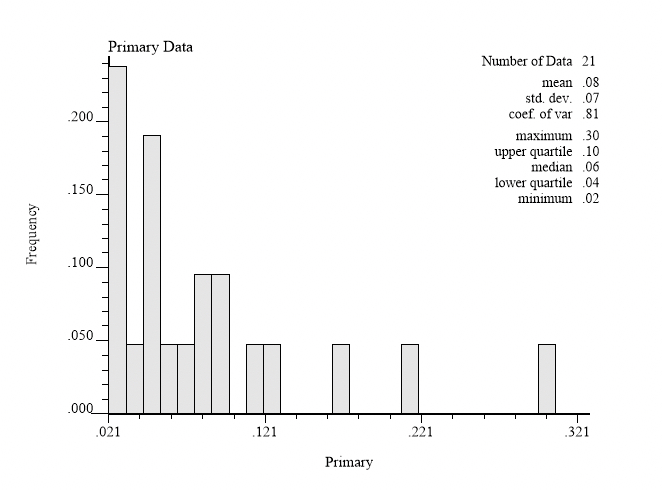

In [36]:
# saving data
primary_data_sort.to_csv("primary_data_sort.txt",sep=' ', index=False)

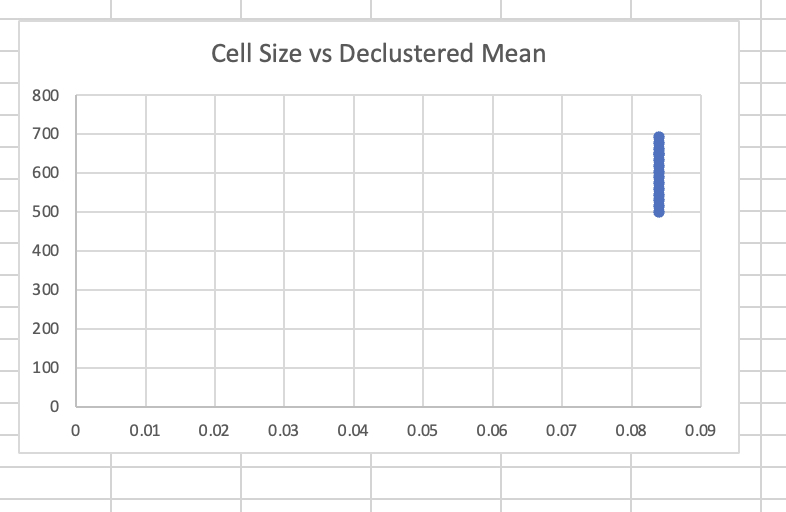

Declustered Mean was found to be 0.084 for bin sizes ranging from 500 - 692

Decluster Secondary Data using GSLIB Declus.exe

In [37]:
#sort secondary data for declustering

secondary_data_sort = pd.read_csv("/content/drive/My Drive/PNG497 Project/offset_data.txt",sep='  ',skiprows=[0,1,2,3,4],header=None, names = ['X','Y','Porosity'])
secondary_data_sort = secondary_data_sort.sort_values(by=['X','Y'], ascending = True)
secondary_data_sort.head()

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


X        Y  Porosity
111  25500.0  29500.0     0.047
143  25500.0  33500.0     0.060
99   25500.0  39500.0     0.076
14   25500.0  53500.0     0.173
58   26500.0  48500.0     0.044

In [38]:
secondary_data_sort.describe()

X             Y    Porosity
count    201.000000    201.000000  201.000000
mean   49415.422886  48828.358209    0.071428
std    14810.057763  13906.172795    0.058163
min    25500.000000  25500.000000    0.015000
25%    36500.000000  36500.000000    0.041000
50%    47500.000000  48500.000000    0.053000
75%    62500.000000  60500.000000    0.076000
max    74500.000000  74500.000000    0.328000

clustered mean is 0.071

Histplt of Secondary Data without Declustered Weights



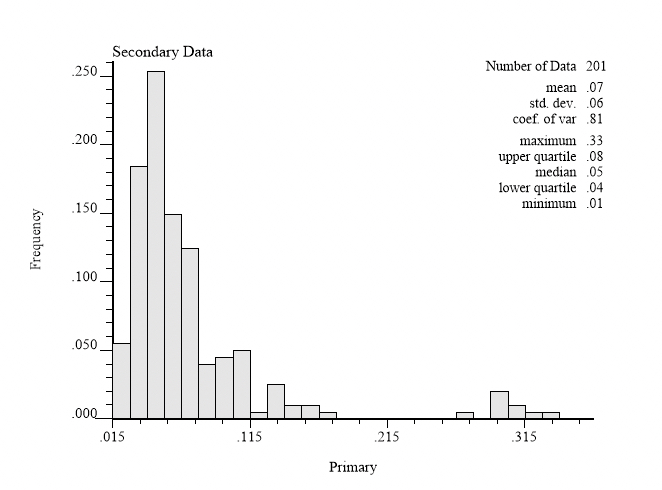

In [39]:
# saving data
secondary_data_sort.to_csv("secondary_data_sort.txt",sep=' ', index=False)

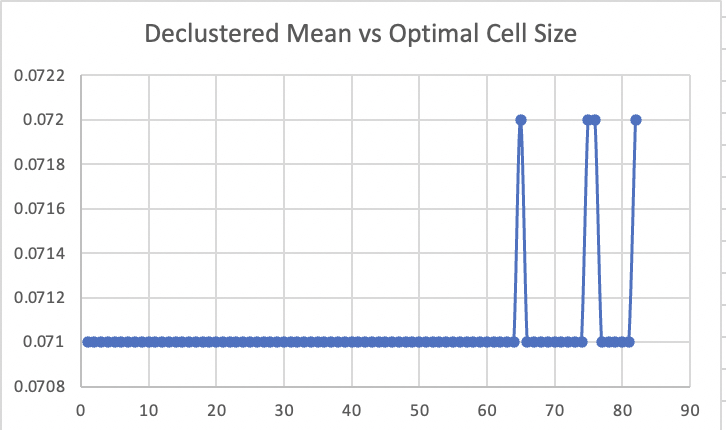

Declustered Mean is 0.072

**Combining Primary and Secondary Data to form a single Data Set**

In [40]:
finalcluster = pd.concat([primary_data_sort,secondary_data_sort]).sort_values(by=['X','Y'], ascending = True)
finalcluster

X        Y  Porosity
111  25500.0  29500.0     0.047
143  25500.0  33500.0     0.060
99   25500.0  39500.0     0.076
14   25500.0  53500.0     0.173
58   26500.0  48500.0     0.044
..       ...      ...       ...
34   74500.0  29500.0     0.079
107  74500.0  36500.0     0.047
40   74500.0  43500.0     0.092
17   74500.0  46500.0     0.018
192  74500.0  62500.0     0.059

[222 rows x 3 columns]

In [41]:
finalcluster.isna().sum()

X           0
Y           0
Porosity    0
dtype: int64

In [42]:
finalcluster.describe()

X             Y    Porosity
count    222.000000    222.000000  222.000000
mean   49400.900901  48936.936937    0.072590
std    14118.089519  13253.295862    0.059262
min    25500.000000  25500.000000    0.015000
25%    37500.000000  38500.000000    0.041000
50%    48500.000000  49500.000000    0.053500
75%    61250.000000  59250.000000    0.077750
max    74500.000000  74500.000000    0.328000

In [43]:
# saving data
finalcluster.to_csv("finalcluster.txt",sep=' ', index=False)

Histplt of Final Cluster Data 

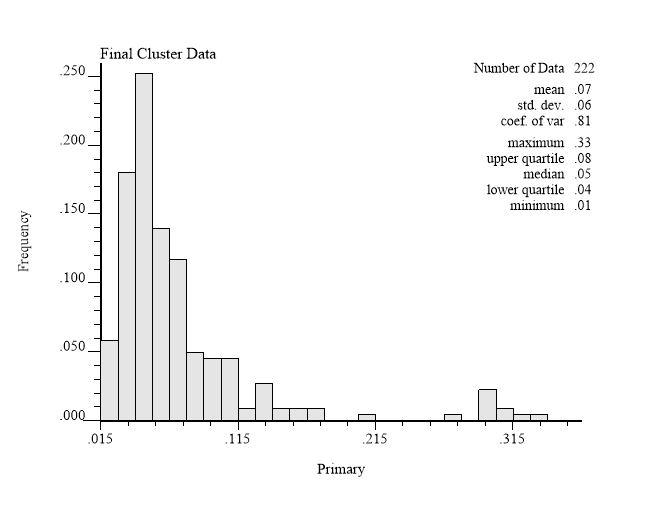

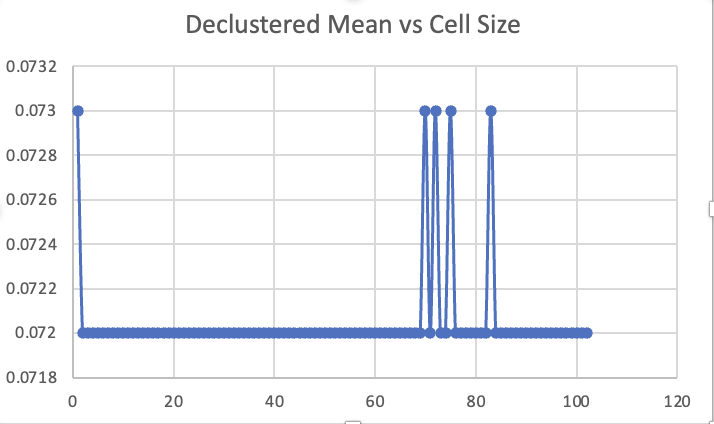

Declustered Mean is 0.073

**Normalize Data**

Using Histhsmth.exe smooth data

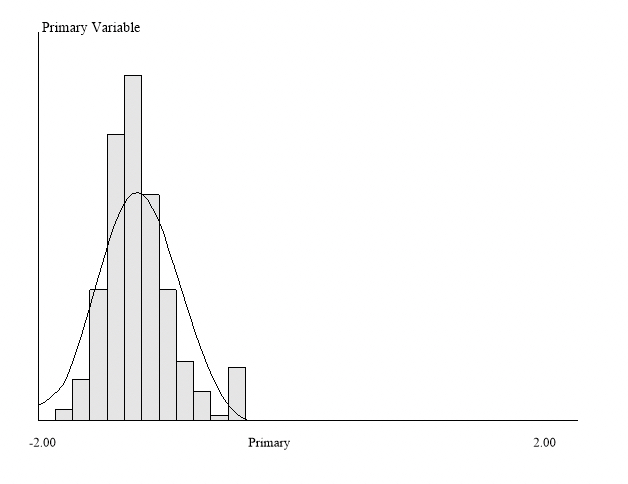

#**Variogram Modelling**

**Omni-Directional Variogram**

*Parameters*

Lag spacing = 1000
Number of lags = 50
Lag tolerance = 500
nugget = 0
sill contribution = variance - nugget = 0.0036
azimuth = 0 degree
azimuth tolerance = 90 degrees
bandh = 50000

Model = Spherical Model

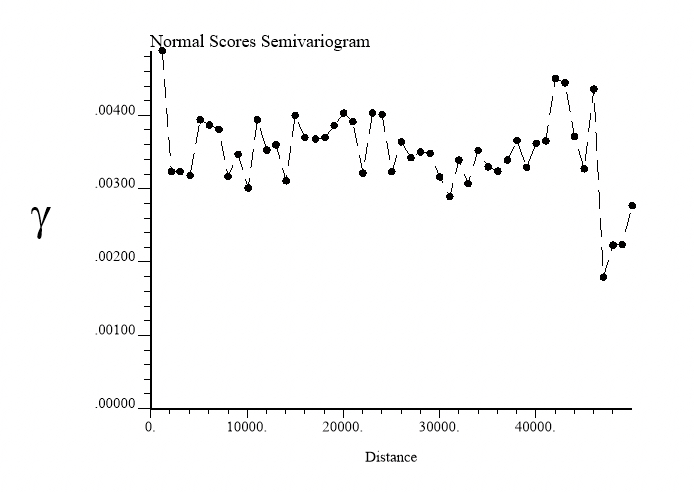

Changed Lag values to find maximum anisotropy and smoothe out the plot since there is alot of variation.

Parameters

Lags = 25 
Lag spacing = 2000
Lag tolerance = 1000




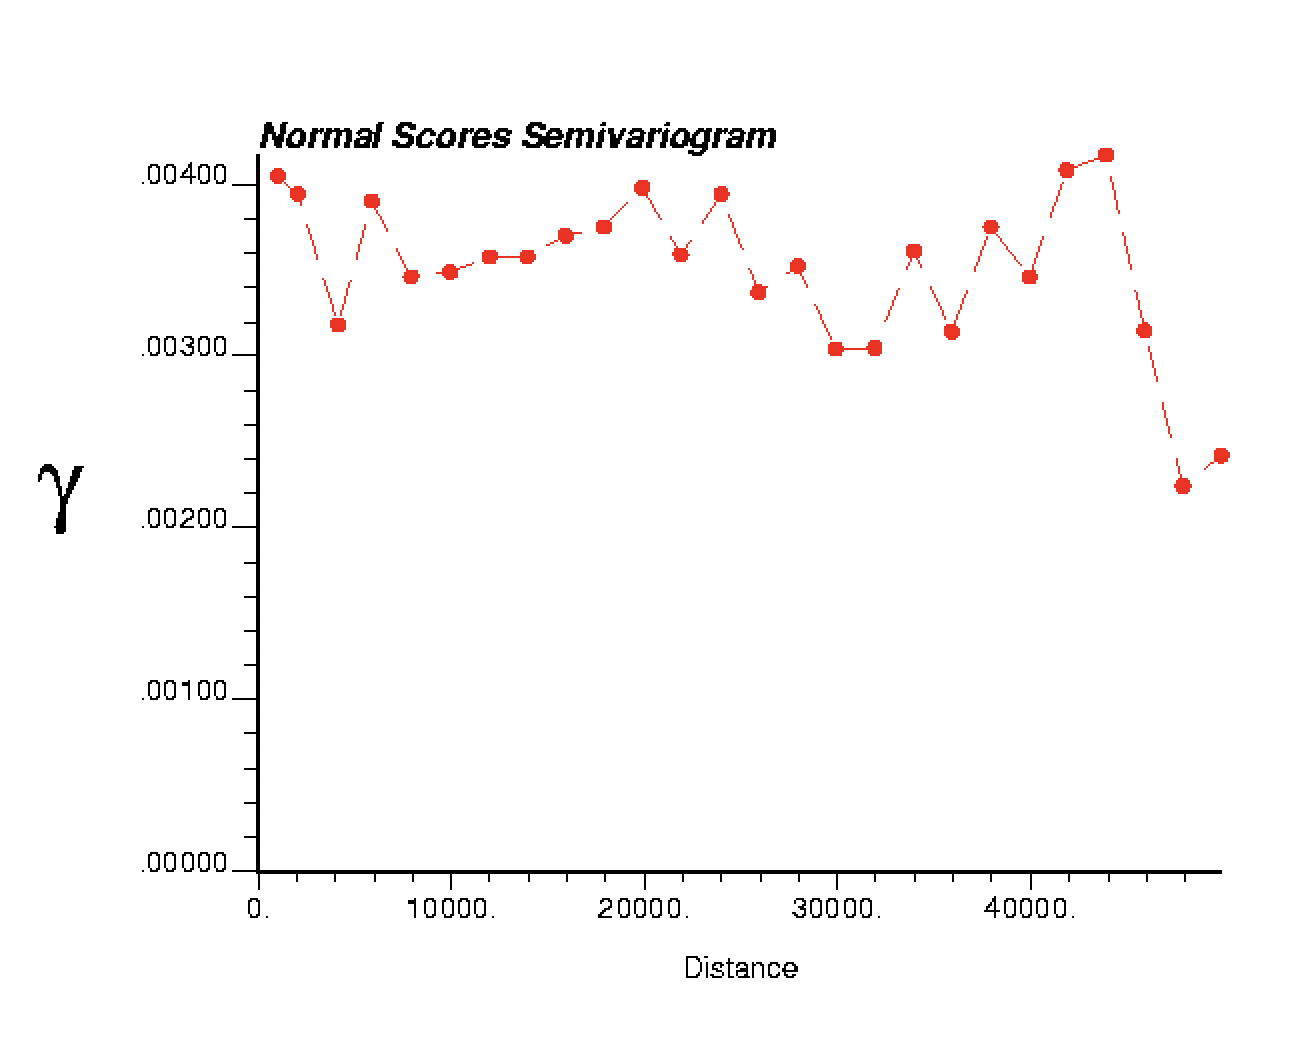

Further altered Lag values to find maximum anisotropy and smoothe out the plot since there is alot of variation.

Parameters

Lags = 13 Lag spacing = 4000 Lag tolerance = 2000

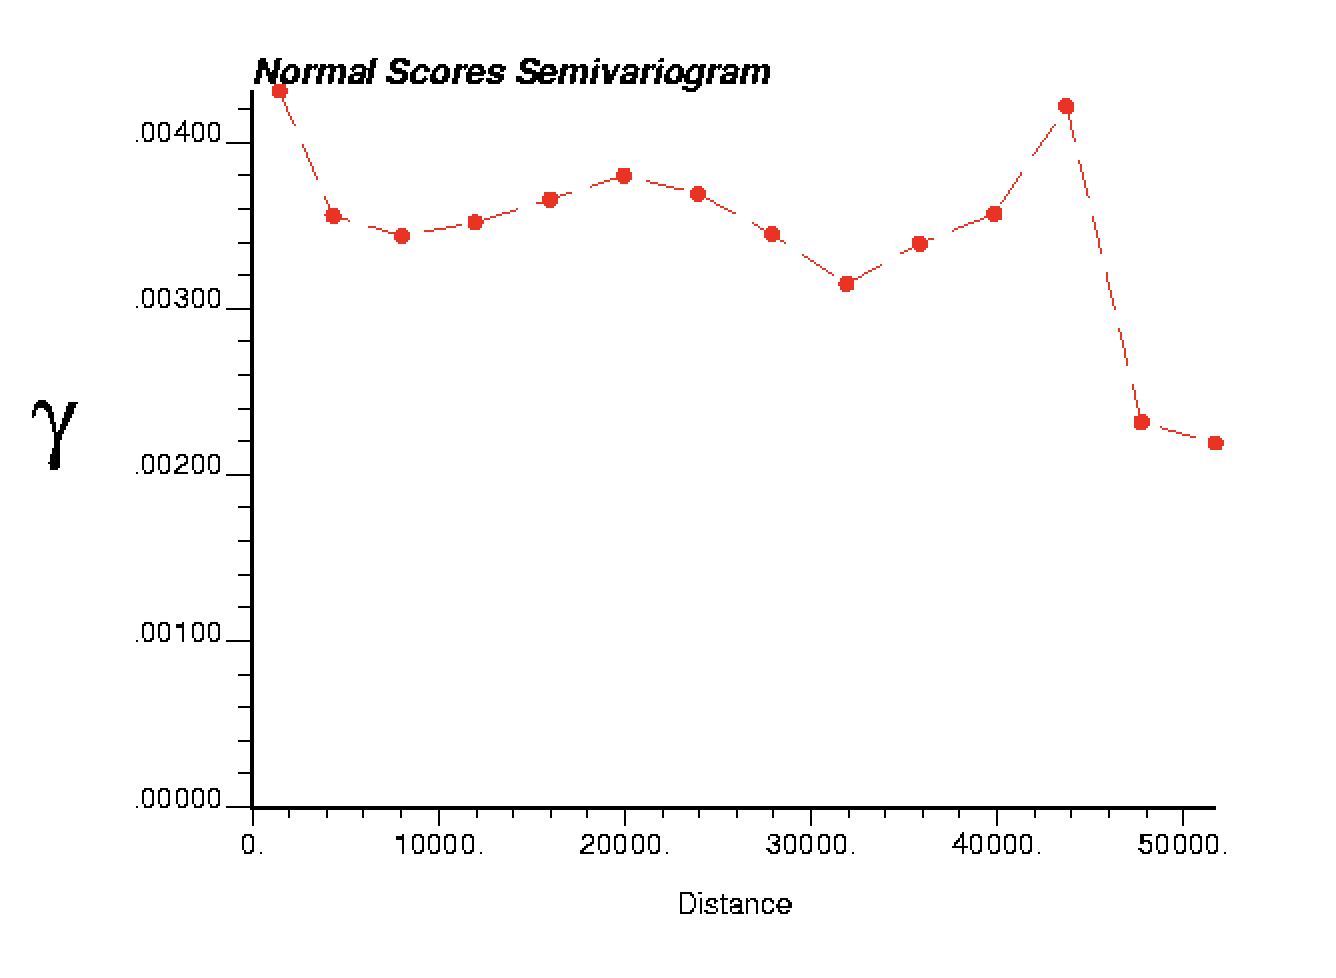

Using a Lag spacing of 4000 and Lag tolerance of 2000 and reducing the number of lags to 13, we get a smoother variogram as seen above.

Finally using a lag spacing of 5000 and limiting the number of lags to 10 produced an even more smoothened variogram. This is the lag values I will using for my directional variograms. I also intoduced a nugget of 0.0001. Below is the plot of the final omni-directional variogram.

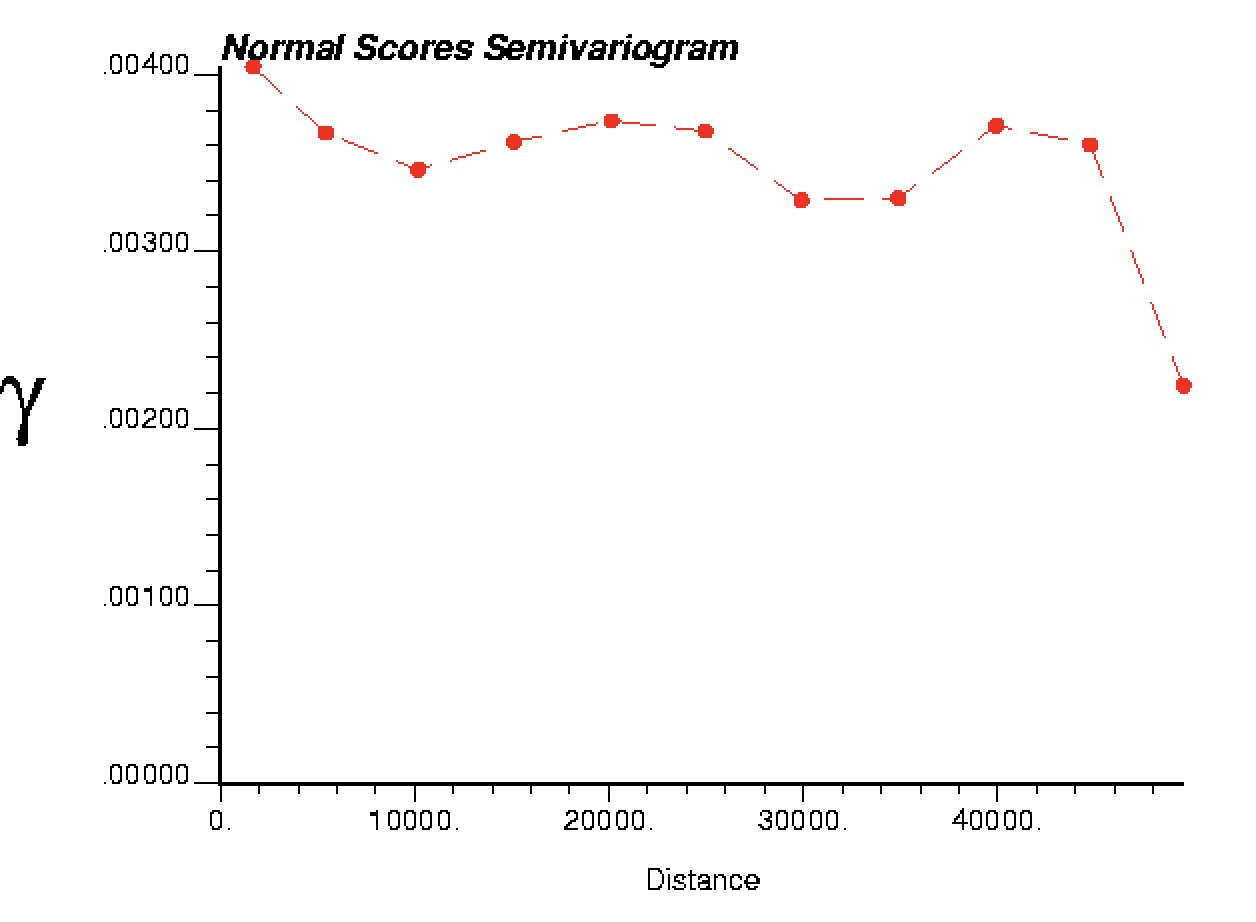

**Directional Variograms**

I choose to compute the variograms in perpendicular directions with a bandwith of 15,000

**First Attempt - 0,90 degree, 45 degree azimuth tolerance**

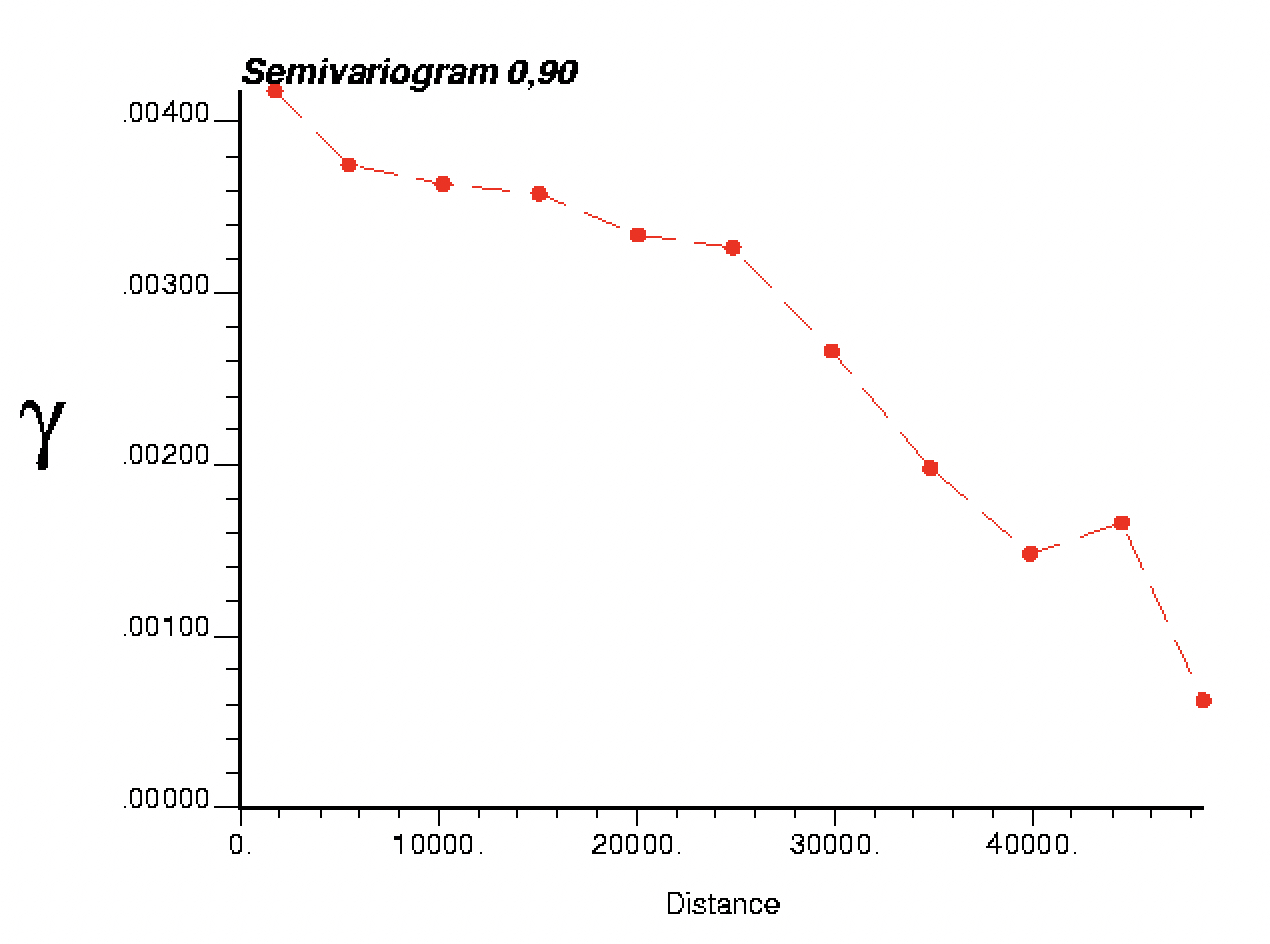

**Second Attempt - 30,120 degree, 22.5 degree azimuth tolerance bandwith =25000**

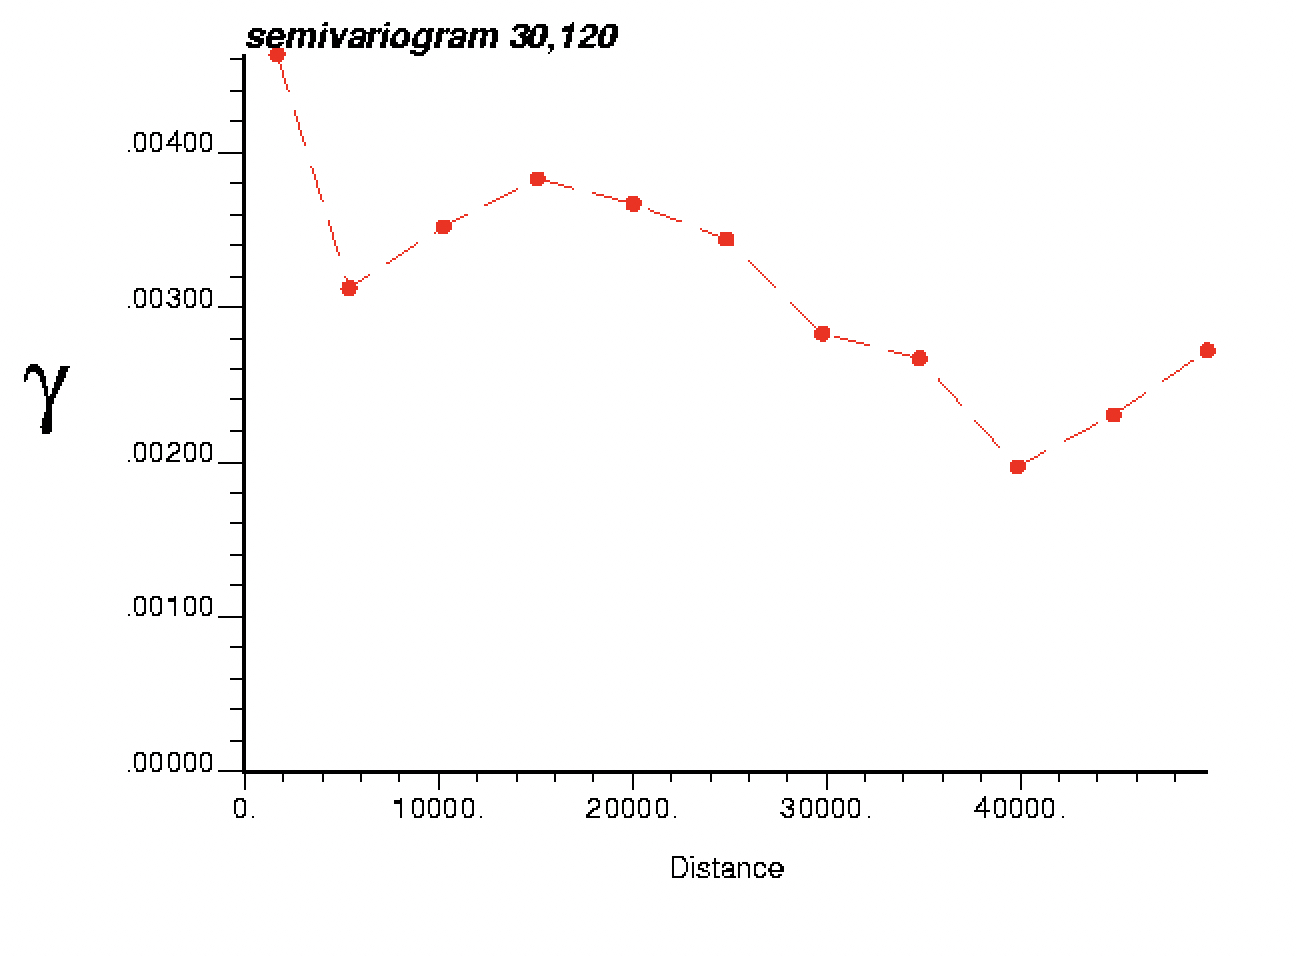

**Third Attempt - 45,135, 22.5 degree azimuth tolerance**

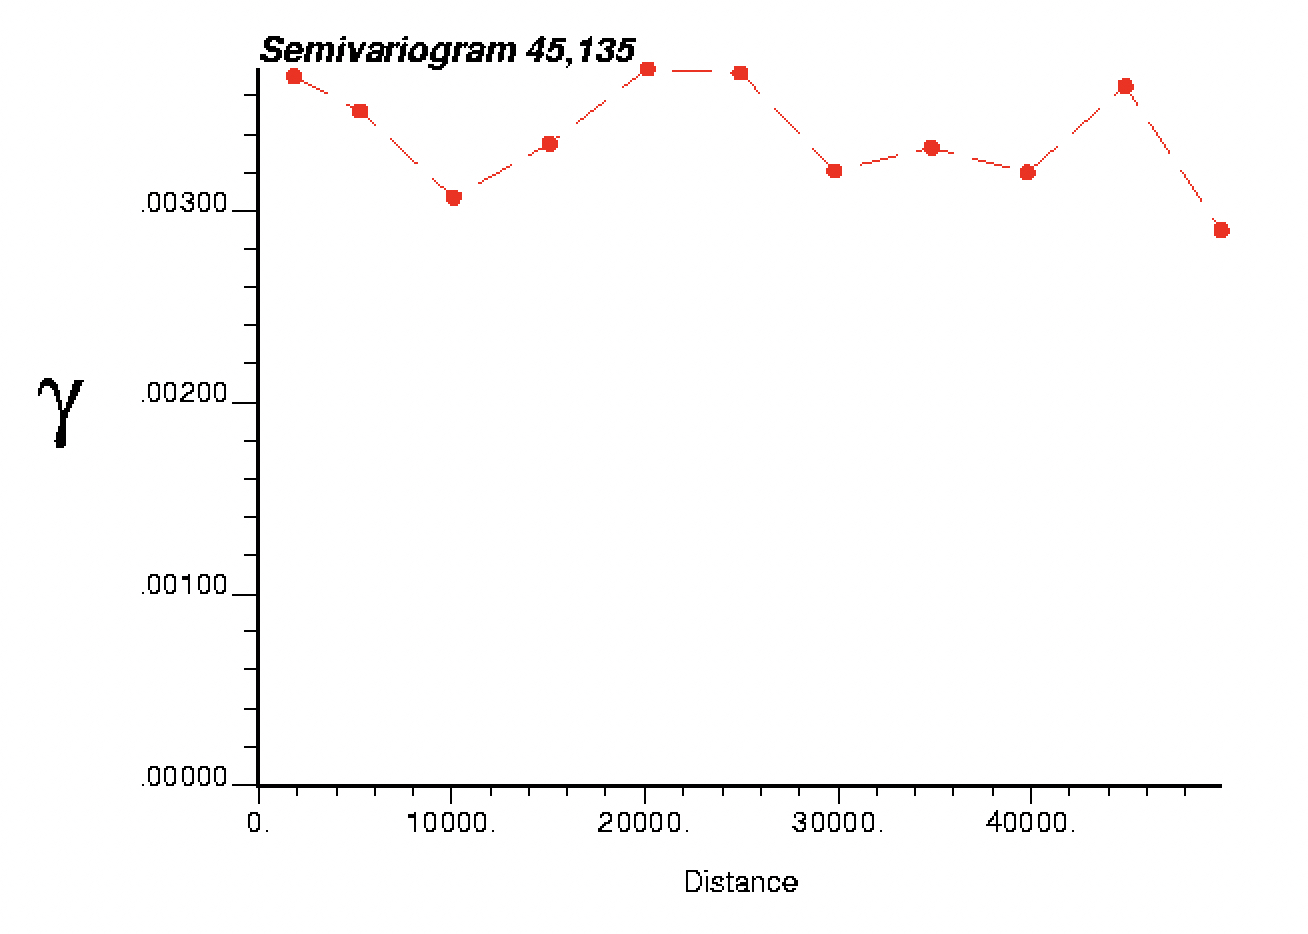

**Fourth Attempt - 90,180, 45 degree azimuth tolerance**



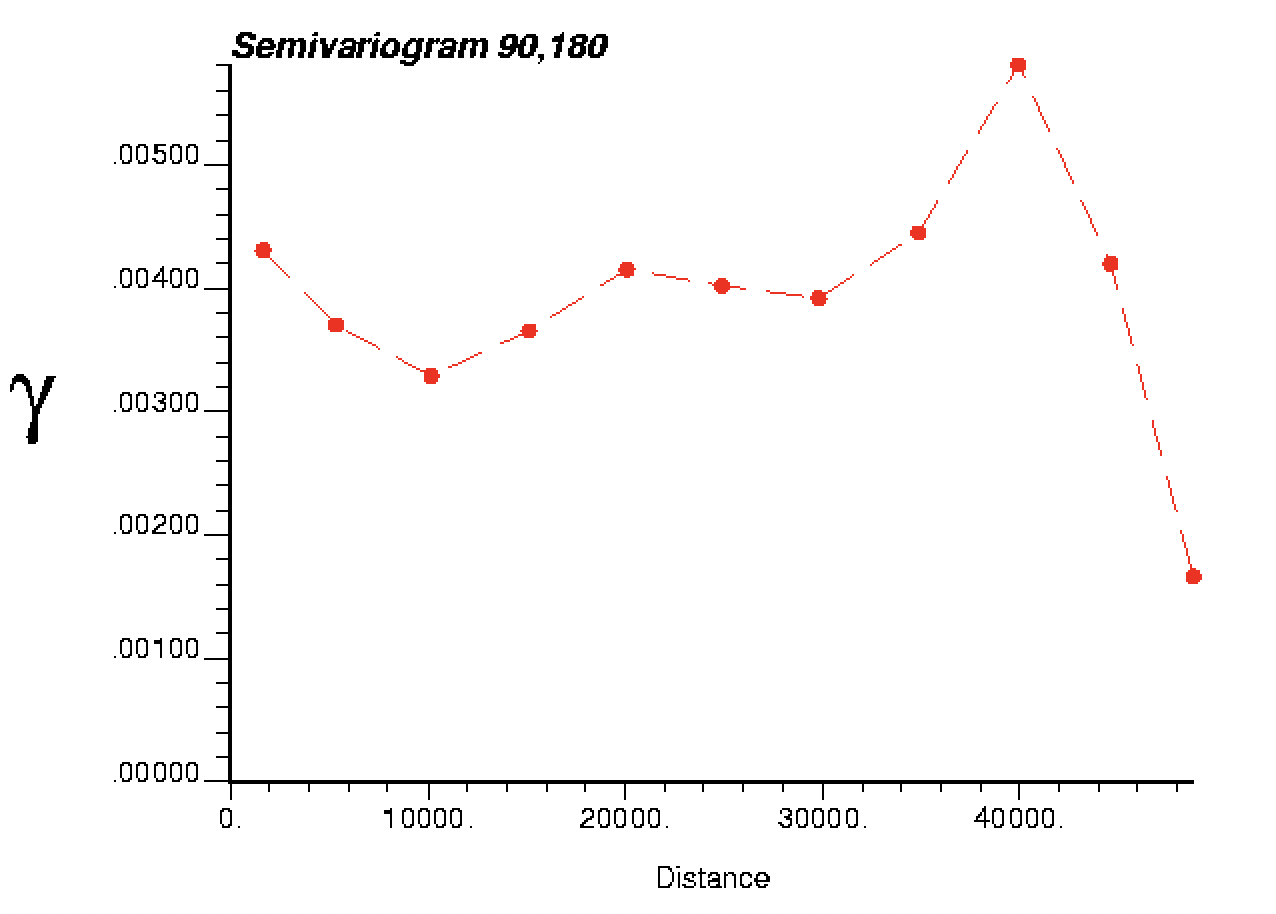

**Final Attempt - 135,225, 45 degree azimuth tolerance**

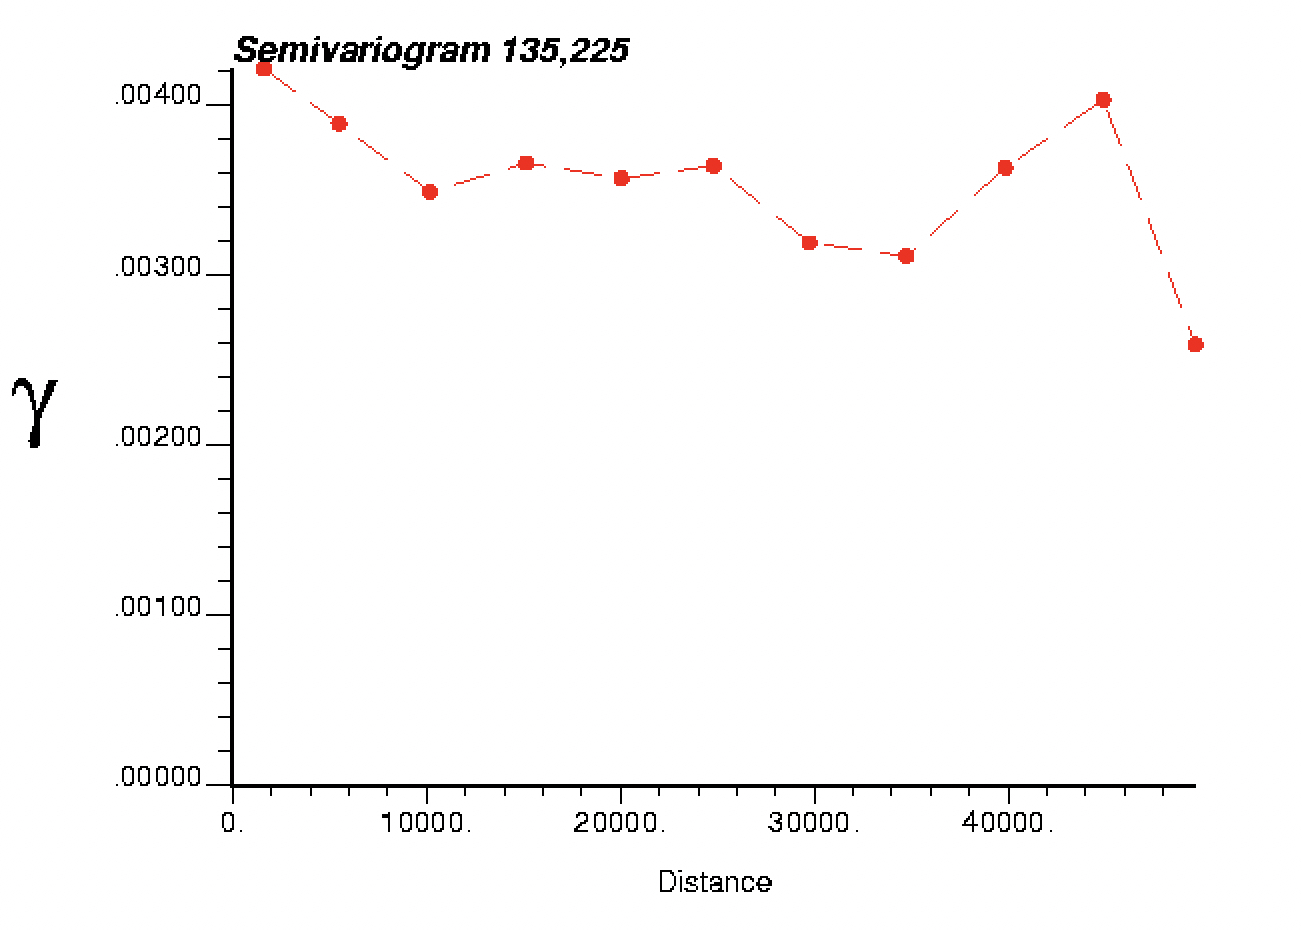

After eyeballing the ranges of perpendicular azimuthal directions and taking the ratio amax/amin, I found that the perpendicular directions with the largest ratio was 30/120 degrees which depicts the directions of maximum anisotropy. From my inference, I will also be working with amin and amax of 5000 and 21000 respectively.

#**Krigging**

I decided to use Simple krigging since the mean of the dataset is known and fairly reliable (primary and secondary data sets have similar mean values) as it has been declustered. I used Kt3d file and included the weights from my nscore standardization. After Krigging I also did the back transformation.
In the next few cells I will importing my porosity map data and plotting it using geopandas.

**Simple Krigging**

In [44]:
#import grided seismic data
porositymap_data = pd.read_csv("/content/drive/My Drive/PNG497 Project/porositymapdata.txt",sep='  ',skiprows=[0,1,2,3,4,5,6,7],header=None, names = ['X','Y','Z','Estimate','EstimateVariance','Back Transform'])
porositymap_data.head()

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


X        Y          Z  Estimate  EstimateVariance  Back Transform
0  25000.0  25000.0  1.0000000     0.073            0.0036           0.055
1  26000.0  25000.0  1.0000000     0.073            0.0036           0.055
2  27000.0  25000.0  1.0000000     0.073            0.0036           0.055
3  28000.0  25000.0  1.0000000     0.073            0.0036           0.055
4  29000.0  25000.0  1.0000000     0.073            0.0036           0.055

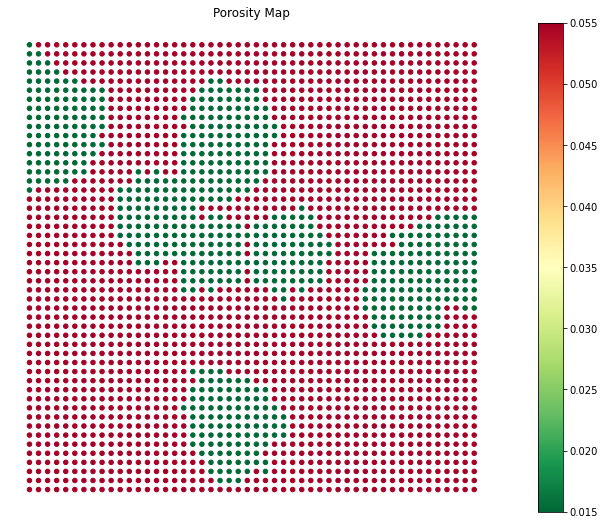

In [ ]:
gdf_porositymap = gpd.GeoDataFrame(porositymap_data,
                       geometry = gpd.points_from_xy(porositymap_data.X,porositymap_data.Y), crs ="EPSG:4326")
# plot the geospatial data
fig, ax = plt.subplots(figsize=(15,9))
gdf_porositymap.plot(column='Back Transform',
                markersize=20,
                cmap='RdYlGn_r', # color map
                legend=True,
                ax=ax , alpha =1.0, aspect=1)
ax.set(title='Porosity Map')
ax.set_axis_off()
plt.show()

#**Results**

Since Simple Krigging uses the average of the entire dataset, which is less accurate than ordinary kriging but produces a smoother result, the porosity values are not expected to completely accurate but unbiased since simple Kriging estimation honors the actually observed values. It generates the simple Kriging estimate and simple Kriging variance. They should provide a measure of precision. In a bid to do some comparison with the previous porosity map before krigging I have included the previous map below.

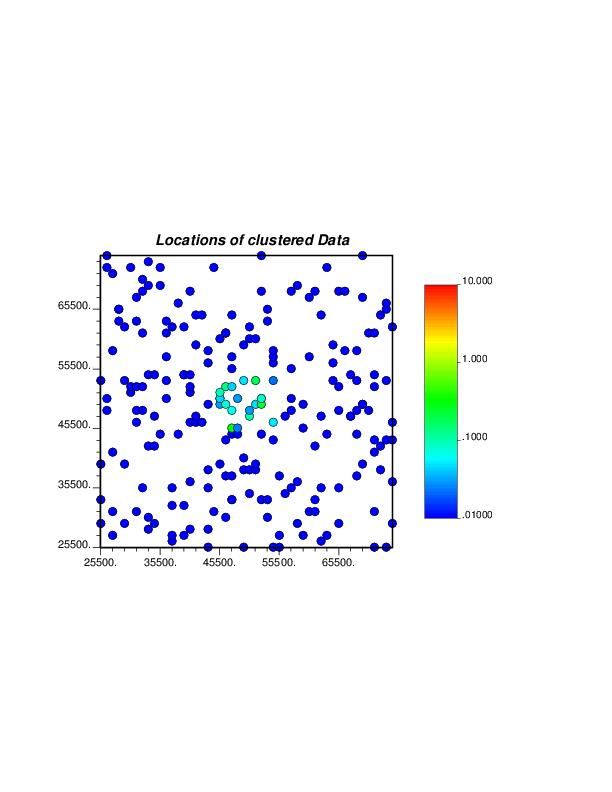

By comparing both datasets we can see that the variance between both plots appears to be zero at areas where conditioning data exists. Also there is no smooth transition between higher and lower values. In comparing the results with the impedance data there is no direct relationship between both data sets however some of the areas on the porosity map with high values have low values on the impedance map and vice versa. This could be indicative of a trend.

Due to errors I encountered using GSLIB I was unable to carryout krigging with external drift.

In [45]:
#import grided seismic data
finaltrend_data = pd.read_csv("/content/drive/My Drive/PNG497 Project/finallocmaptrend.txt",sep='  ',skiprows=[0,1,2,3,4,5,6,7],header=None, names = ['X','Y','Z','Estimate','EstimateVariance','Back Transform'])
finaltrend_data.head()

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


X        Y          Z  Estimate  EstimateVariance  Back Transform
0  25000.0  25000.0  1.0000000     0.073            0.0036           0.055
1  26000.0  25000.0  1.0000000     0.073            0.0036           0.055
2  27000.0  25000.0  1.0000000     0.073            0.0036           0.055
3  28000.0  25000.0  1.0000000     0.073            0.0036           0.055
4  29000.0  25000.0  1.0000000     0.073            0.0036           0.055

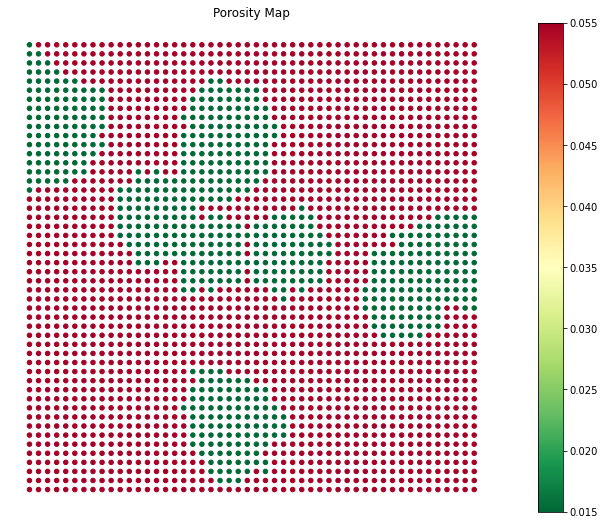

In [46]:
gdf_porositymap = gpd.GeoDataFrame(finaltrend_data,
                       geometry = gpd.points_from_xy(porositymap_data.X,porositymap_data.Y), crs ="EPSG:4326")
# plot the geospatial data
fig, ax = plt.subplots(figsize=(15,9))
gdf_porositymap.plot(column='Back Transform',
                markersize=20,
                cmap='RdYlGn_r', # color map
                legend=True,
                ax=ax , alpha =1.0, aspect=1)
ax.set(title='Porosity Map')
ax.set_axis_off()
plt.show()